# Is the Shape of fMRI Hemodynamic Responses Relevant for Studying Neural Function
## Abstract
Variations in the shape of the hemodynamic function is typically considered strictly dependant on vascular-related factors and irrelevant to the study of neural function--neural activity in a given piece of brain tissue triggers a stereotypical reponse time course. Recent work however suggest the temporal shape of a response varies according to stimulus or task conditions, suggesting different shapes may be diagnostic of different underlying neural processes.

[working model with inhibition]

[confirms prediction of the model only for overlaid stimuli] Here show that one temporal shape parameter, the delay of the fMRI BOLD response, is increased when competing visual stimuli are overlayed, but not unaffeted when stimuli are presented alone.

We interpret our results as evidence that the hemodynamic delay may reflect the balance between excitation and inhibition involve in local neural processes.

With further experimental validation, this could bring fMRI methods beyond the mapping of brain functions and closer to more clinically-relevant descriptions neural processes within a given brain tissue.
## Context
## Working Model and Hypothesis

## Experimental Approach and Data Acquisition
### Stimuli
### Functional MRI Paradigm
In each run, stimuli were presented at one of two orthogonal orientations (+/- 45 degrees) in alternating 6-sec ON and 6-sec OFF blocs. This produced sinusoidal BOLD signal variations in V1 cortex.

In [1]:
clear all
addpath(genpath(fullfile(pwd,'matlabFun')));

Please get the data from the repo if not done already
data repo: C:/Users/sebas/OneDrive - McGill University/dataBig
IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: preprocessed functionals (C-derived\DecodingHR\fun\x)
IN: stimulus timing (B-clean\DecodingHR\stim\160118_cyclicStim\data)
F(IN)=OUT: 2-df sinusoidal fit to single voxel time series
OUT: fit params and stats + HRF estimates (C-derived\DecodingHR\fun\y)
Not actually running because way too long
C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\y\designMatrices_randomEffect.fig
C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\y\designMatrices_fixedEffect.fig



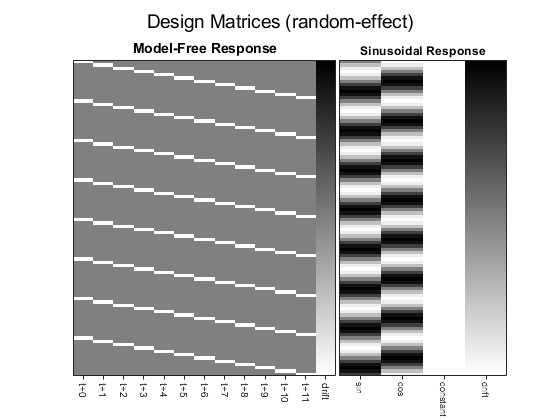

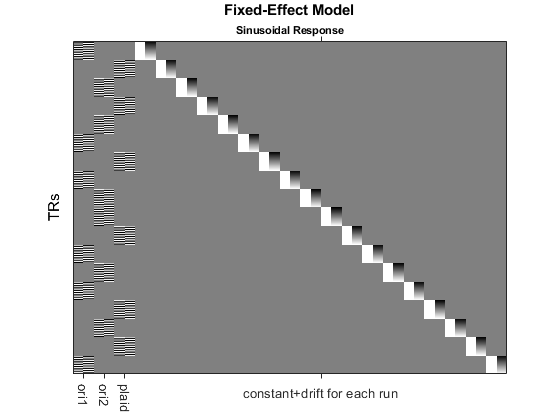

In [2]:
runFit

IN: anatomical V1 roi (C-derived\DecodingHR\anat\z)
IN: voxel visual field eccentricity (C-derived\DecodingHR\anat\z)
IN: sinusoidal fit results (C-derived\DecodingHR\fun\y)
F(IN)=OUT: masks the fit according to voxel eccentricity and activation level
Figures are additionally thresholded for activation level, but not the data that is saved!
OUT: sinusoidal fit results (C-derived\DecodingHR\fun\z)
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\02jp_defineAndShowMasks.mat
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\03sk_defineAndShowMasks.mat
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\04sp_defineAndShowMasks.mat
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\05bm_defineAndShowMasks.mat
Saving to: C:\Users\sebas\OneDrive - McGill University\dataBig\C-derived\DecodingHR\fun\z\06sb_defineAndShowMasks.mat
Saving to:

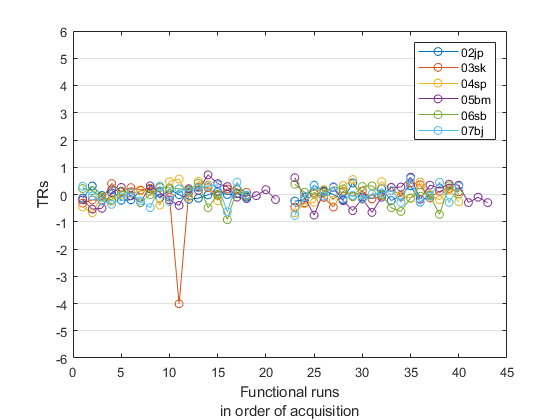

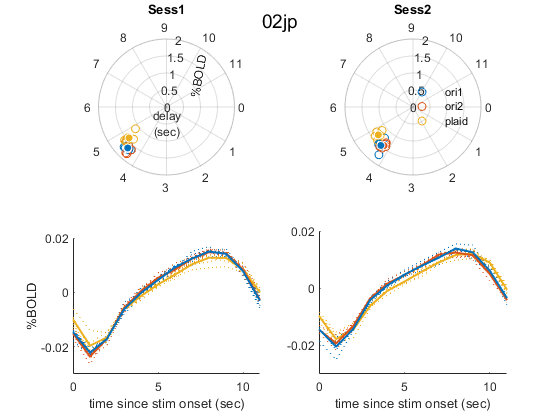

In [3]:
fitType = 'fixed';
threshType = 'p';
veinPerc = 20;
saveFig = 0;
defineAndShowMasks(fitType,threshType,veinPerc,saveFig)
applyFeatSelAndClean(saveFig)

## Prediction 1: Competing stimuli evoke a more delayed HR, compared to stimuli presented alone.

### Compare responses evoked by different stimuli

***
delay (plaid-ori) = 0.164s
delay (ori2-ori1) = 0.059s
amp (plaid-ori) = -0.038%BOLD
amp (ori2-ori1) = -0.028%BOLD
***
---------------
Cartesian Space
---------------
Ori vs Plaid:
Hotelling's T^2 multivariate test
 T^2=8.87
 p=0.13
Ori1 vs Ori2:
 Hotelling's T^2 multivariate test
 T^2=1.01; p=0.69
---------------
Polar Amplitude
---------------
Ori vs Plaid (one-tailed):
 Student's t-test
 t=1.01; p=0.18
 Wilcoxon signed rank test
 signed rank=14.00; p=0.28
Ori1 vs Ori2:
 Student's t-test
 t=0.97; p=0.38
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
-----------
Polar Delay
-----------
Ori vs Plaid (one-tail):
 Student's t-test
 t=4.33; p=0.00
 Wilcoxon signed rank test
 signed rank=21.00; p=0.02
 Hotelling's test for angular means
 F=21.00; p=0.03
Ori1 vs Ori2:
 Student's t-test
 t=0.81; p=0.45
 Wilcoxon signed rank test
 signed rank=14.00; p=0.56
 Hotelling's test for angular means
 F=14.00; p=0.74
Ori1 vs Plaid (one-tail):
 Student's t-test
 t=4.57; p=0.00
 Wilcoxon signe

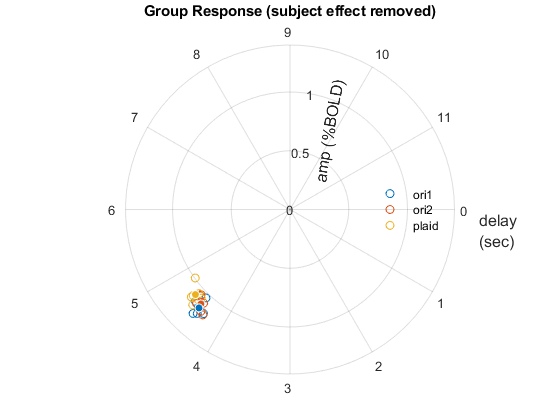

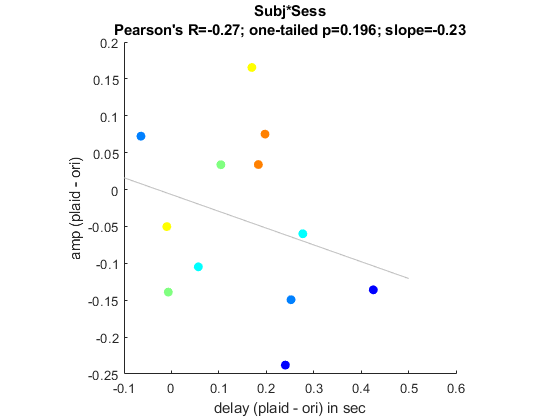

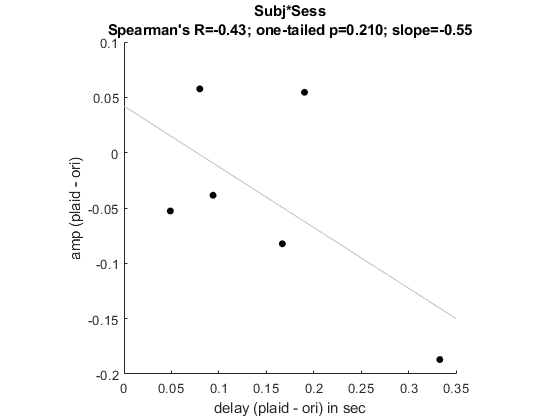

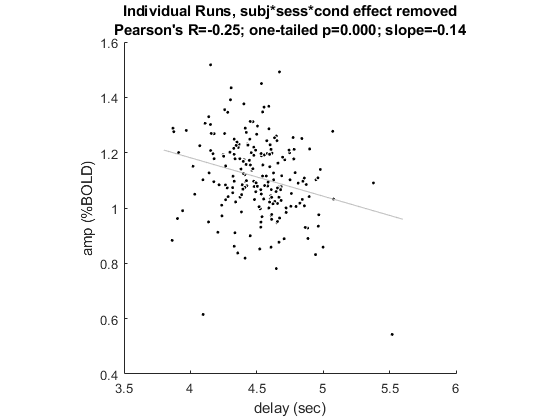

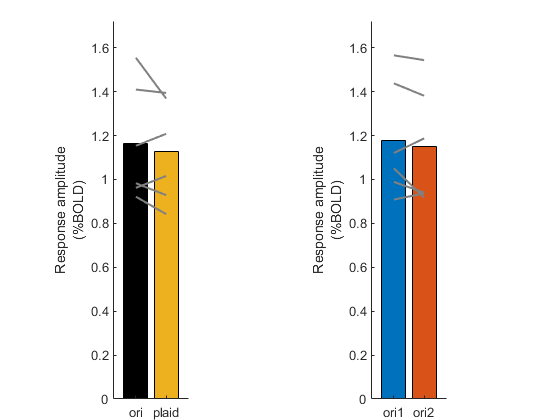

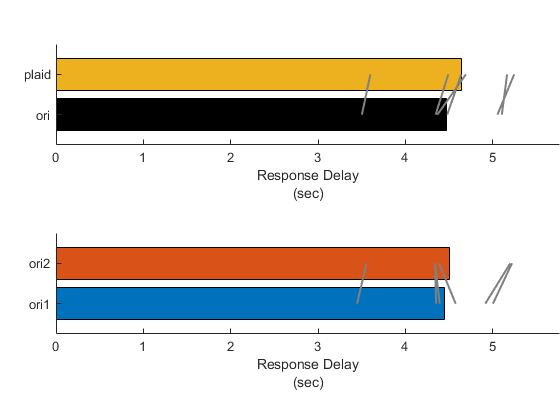

In [4]:
runGroupAnalysis_sin(saveFig)

### Visualize the sinusoidal response in V1

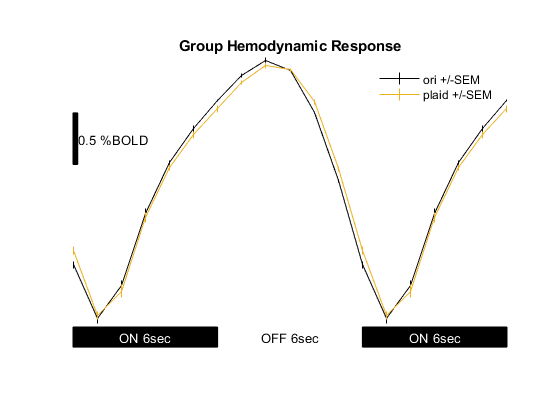

In [5]:
runGroupAnalysis_hr(saveFig)

### Conclusion on Prediction 1
The inhibition involve by the overlayed presentation of orhtogonal grating increases the hemodynamic delay with little effect on the amplitude of the hemodynamic response. The excitation/inhibition balance is altered, not the overlay level of synaptic acticity.

## Prediction 2: Stimulus orientation can be predicted not only from the multivoxel pattern of BOLD responses, but also from the pattern of BOLD delays

---
SVM space: cart_HT
Group results:
  hit    =87/142
  acc    =61.27%
 binomial stats
  thresh =57.20%
  p      =0.003)
---
SVM space: cartNoAmp_HT
Group results:
  hit    =85/142
  acc    =59.86%
 binomial stats
  thresh =57.20%
  p      =0.007)
---
SVM space: polMag_T
Group results:
  hit    =84/142
  acc    =59.15%
 binomial stats
  thresh =57.20%
  p      =0.012)
    {'cart_HT'}    {'cartNoAmp_HT'}    {'polMag_T'}

signedrank   = 15.00  21.00  12.50
signedrank p = 0.0313  0.0156  0.1250
group accuracy  = 61.27%  59.86%  59.15%
binomial   p    = 0.0027   0.0073   0.0116



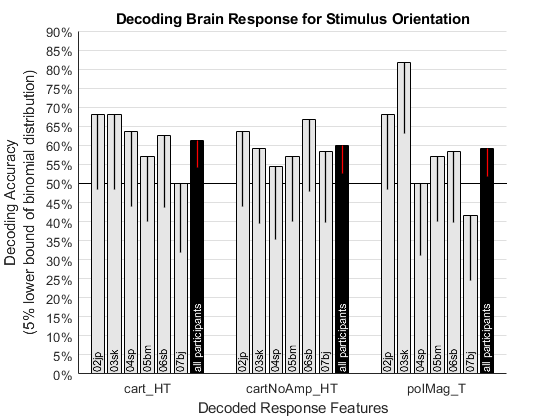

In [6]:
clear res

svmSpace = 'cart_HT';
resTmp = runDecoding(svmSpace);
res.(svmSpace) = resTmp;

svmSpace = 'cartNoAmp_HT';
resTmp = runDecoding(svmSpace);
res.(svmSpace) = resTmp;

svmSpace = 'polMag_T';
resTmp = runDecoding(svmSpace);
res.(svmSpace) = resTmp;

plotDecoding(res,saveFig)

---
SVM space: cart_HT
permutation found on disk, skipping
Group results:
  hit    =87/142
  acc    =61.27%
 permutation test stats
  thresh =57.04%
  p      =0.001)
---
SVM space: cartNoAmp_HT
permutation found on disk, skipping
Group results:
  hit    =85/142
  acc    =59.86%
 permutation test stats
  thresh =57.04%
  p      =0.006)
---
SVM space: polMag_T
permutation found on disk, skipping
Group results:
  hit    =84/142
  acc    =59.15%
 permutation test stats
  thresh =57.04%
  p      =0.013)



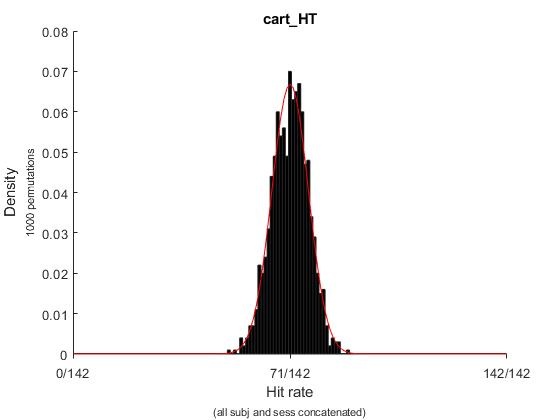

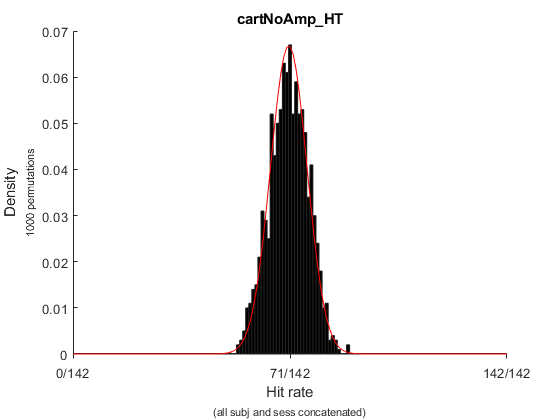

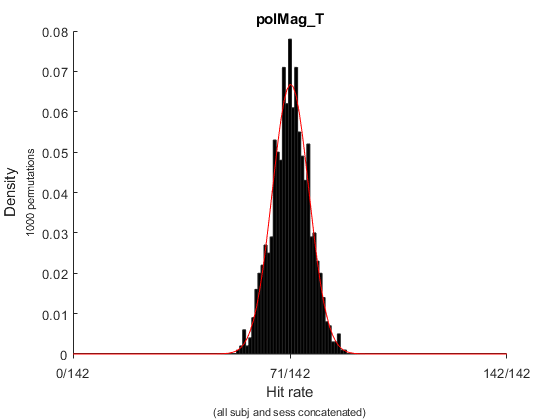

In [7]:
nPerm = 1000;

svmSpace = 'cart_HT';
res.(svmSpace) = runDecoding(res.(svmSpace),nPerm);

svmSpace = 'cartNoAmp_HT';
res.(svmSpace) = runDecoding(res.(svmSpace),nPerm);

svmSpace = 'polMag_T';
res.(svmSpace) = runDecoding(res.(svmSpace),nPerm);

plotDecodingPerm(res,saveFig)

In [8]:
% clear res

% svmSpace = 'hr';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% svmSpace = 'hrNoAmp';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% plotDecoding(res)

In [9]:
% clear res

% svmSpace = 'polMag';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% svmSpace = 'polDelay';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% svmSpace = 'cartReal';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% plotDecoding(res)

In [10]:
% clear res

% svmSpace = 'cart';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% svmSpace = 'cartNoAmp';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% svmSpace = 'polMag';
% resTmp = runDecoding(svmSpace);
% disp(['mean(nObs) =' num2str(round(mean(mean(resTmp.summary.nObs,2),1)))])
% disp(['mean(nFeat)=' num2str(round(mean(mean(resTmp.summary.nDim,2),1)))])
% res.(svmSpace) = resTmp;

% plotDecoding(res)

In [36]:
?%plot

%plot [options] backend - configure plotting for the session.

This line magic will configure the plot settings for this
language.

Examples:
    %plot qt --format=png
    %plot inline -w 640

Note: not all languages may support the %plot magic, and not all
options may be supported.

Options:
-------
-h --height    Plot height in pixels
-w --width     Plot width in pixels
-r --resolution Resolution in pixels per inch
-b --backend   Backend selection [default: inline]
-f --format    Plot format (png, svg or jpg).
-s --size      Pixel size of plots, "width,height"

In [46]:
%lsmagic

Available line magics:
%activity  %cd  %connect_info  %conversation  %dot  %download  %edit  %get  %help  %html  %include  %install  %install_magic  %javascript  %jigsaw  %kernel  %kx  %latex  %load  %ls  %lsmagic  %macro  %magic  %matplotlib  %parallel  %plot  %pmap  %px  %python  %reload_magics  %restart  %run  %scheme  %set  %shell

Available cell magics:
%%activity  %%brain  %%conversation  %%debug  %%dot  %%file  %%help  %%html  %%javascript  %%kx  %%latex  %%macro  %%pipe  %%processing  %%px  %%python  %%scheme  %%shell  %%show  %%time  %%tutor


In [48]:
%%shell
jupyter nbconvert --to pdf HRdelay.ipynb

[NbConvertApp] Converting notebook HRdelay.ipynb to pdf


[NbConvertApp] Support files will be in HRdelay_files\


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Making directory .\HRdelay_files


[NbConvertApp] Writing 46509 bytes to notebook.tex


[NbConvertApp] Building PDF


Traceback (most recent call last):


  File "C:\User

In [7]:
%%bash
pwd


ans =

    'C:\Users\sebas\Documents\GitHub\McGill\neuroimaging'




### Conclusion on Prediction 2
Sensitivity of the paradigm confirmed.
But stimulus presented alone do not significantly affect the delay.
Neural inhibition activity related to cross-orientation suppression may only be sufficiently strong under situations where there is sufficient feed-forward drive to the inhibited neural population.

## Conclusion
Overlayed orthogonal gratings induced mutual ihibitory activity between two neural populations (alter the excitation/inhibition balance) that contribute the the fMRI response in a way that delays to measured response.

Gratings presented alone induce balanced levels of excitation and inhibition, leading to indiscriminable hemodynamic delays.